# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from statistics import  mean
#from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [156]:
weather_api_key = "8168fbae880e1040f8801caf20dacb41"
geoapify_key = "8863754dc7ed48a7a75dadc094613d0d"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [157]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        #city_max_temp = city_weather['coord']['lat']
        city_humidity = city_weather['main']['humidity']
        #city_humidity = city_weather['coord']['lat']
        city_clouds = city_weather['clouds']['all']
        #city_clouds = city_weather['coord']['loall
        city_wind = city_weather['wind']['speed']
        #city_wind = city_weather['coord']['lon']
        #city_country = city_weather['sys']['country']
        city_country = city_weather['coord']['lon']
        #city_date = city_weather['dt']
        city_date = city_weather['coord']['lon']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hammerfest
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | susuman
Processing Record 5 of Set 1 | happy valley-goose bay
Processing Record 6 of Set 1 | chu
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | sucre
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | gardnerville ranchos
Processing Record 15 of Set 1 | tofol
Processing Record 16 of Set 1 | seminole
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | santa fe do sul
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | port mathurin
Process

In [158]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [159]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hammerfest,70.6634,23.6821,0.25,93,75,0.51,23.6821,23.6821
1,wailua homesteads,22.0669,-159.3780,27.44,76,75,10.29,-159.3780,-159.3780
2,ushuaia,-54.8000,-68.3000,7.48,88,94,2.16,-68.3000,-68.3000
3,susuman,62.7833,148.1667,-16.47,99,99,0.45,148.1667,148.1667
4,happy valley-goose bay,53.3168,-60.3315,0.47,68,5,1.50,-60.3315,-60.3315


In [160]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [161]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,0.25,93,75,0.51,23.6821,23.6821
1,wailua homesteads,22.0669,-159.3780,27.44,76,75,10.29,-159.3780,-159.3780
2,ushuaia,-54.8000,-68.3000,7.48,88,94,2.16,-68.3000,-68.3000
3,susuman,62.7833,148.1667,-16.47,99,99,0.45,148.1667,148.1667
4,happy valley-goose bay,53.3168,-60.3315,0.47,68,5,1.50,-60.3315,-60.3315


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

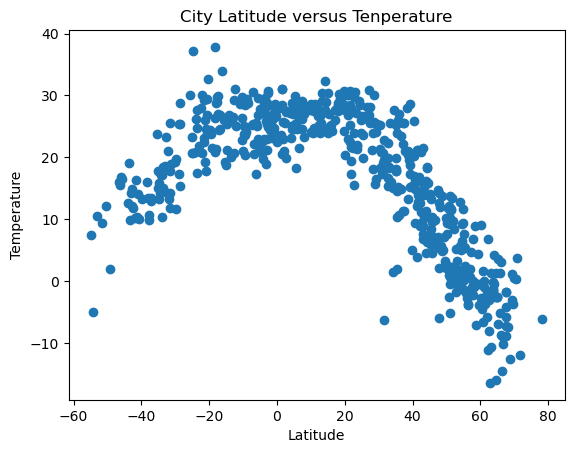

In [162]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)



# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude versus Tenperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

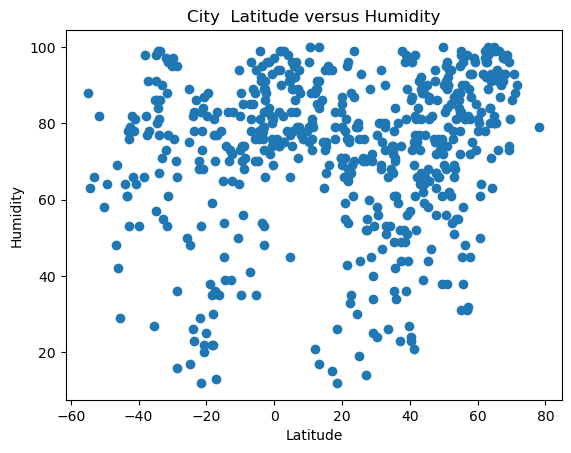

In [163]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City  Latitude versus Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

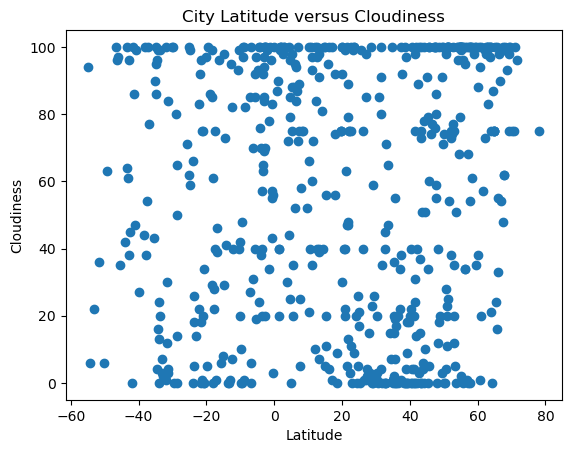

In [164]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude versus Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

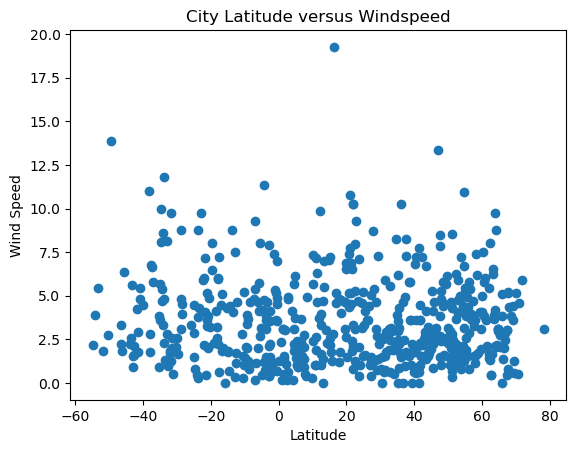

In [165]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude versus Windspeed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [166]:
# Define a function to create Linear Regression plots
def linear_regression_plt(x_values, y_values, xlabel, ylabel, hemisphere):
    from statistics import mean
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title( xlabel + " versus " + ylabel + " " + hemisphere + " Linear Regression")
    #plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    #plt.annotate(line_eq,(20,round(intercept,2)),fontsize=15,color="red")
    xposit = round(mean(x_values),0)
    yposit = round(mean(y_values),0)
    plt.annotate(line_eq, (xposit, yposit),ha="center", va="center", fontsize=20,color="red", weight = 'bold')

    # Print r value
    print(f"The r-value is: {rvalue**2}")
    filename = "output_data/" + xlabel + ylabel + hemisphere + ".png" 
    plt.savefig(filename)
    return(plt.show())
    


In [167]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
#northern_hemi.df = city_data_df.query('Latitude' >= 0)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,0.25,93,75,0.51,23.6821,23.6821
1,wailua homesteads,22.0669,-159.3780,27.44,76,75,10.29,-159.3780,-159.3780
3,susuman,62.7833,148.1667,-16.47,99,99,0.45,148.1667,148.1667
4,happy valley-goose bay,53.3168,-60.3315,0.47,68,5,1.50,-60.3315,-60.3315
5,chu,43.5983,73.7614,7.16,88,51,1.37,73.7614,73.7614


In [168]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.48,88,94,2.16,-68.3000,-68.3000
8,invercargill,-46.4000,168.3500,15.57,69,96,2.24,168.3500,168.3500
9,waitangi,-43.9535,-176.5597,12.68,64,42,2.24,-176.5597,-176.5597
10,port-aux-francais,-49.3500,70.2167,1.88,64,63,13.87,70.2167,70.2167
11,sucre,-19.0333,-65.2627,21.52,38,86,2.29,-65.2627,-65.2627


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0      -4.184176
1      22.201277
3       0.094322
4       5.234155
5      10.510811
         ...    
558    11.565328
559     8.014600
561    17.079579
562    22.002340
563    26.418313
Name: Lat, Length: 389, dtype: float64
y = -0.54x +34.18
The r-value is: 0.775046903959307


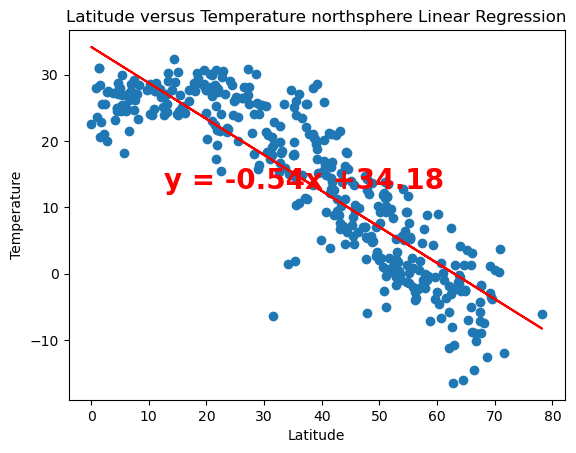

In [169]:
# Linear regression on Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Temperature", "northsphere")

City_ID
2      10.339370
8      13.164923
9      13.987865
10     12.172616
11     22.370403
         ...    
552    24.487112
554    24.551292
555    21.277184
560    18.135573
564    23.304383
Name: Lat, Length: 176, dtype: float64
y = 0.34x +28.77
The r-value is: 0.5365023565215011


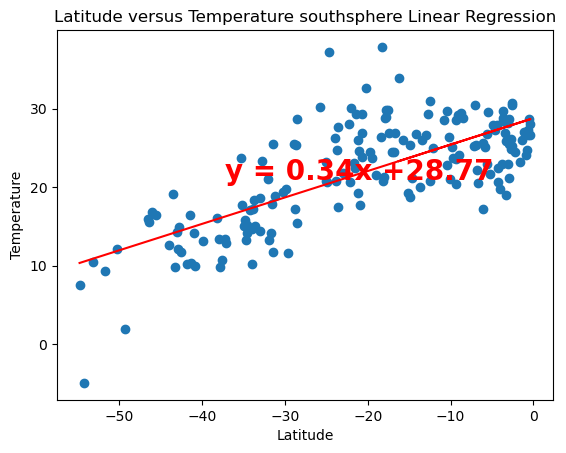

In [170]:
# Linear regression on Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Temperature", "southsphere")

**Discussion about the linear relationship:** 
There is a very strong correlation between Latitude and temparature. Cities tha lie proximate to the equator have the highest temperatture while the further away either Northward or Southwards, the lower the tempaeratre.

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      77.006375
1      72.916432
3      76.343176
4      75.546463
5      74.728542
         ...    
558    74.565084
559    75.115473
561    73.710333
562    72.947268
563    72.262759
Name: Lat, Length: 389, dtype: float64
y = 0.08x +71.06
The r-value is: 0.007333481983020714


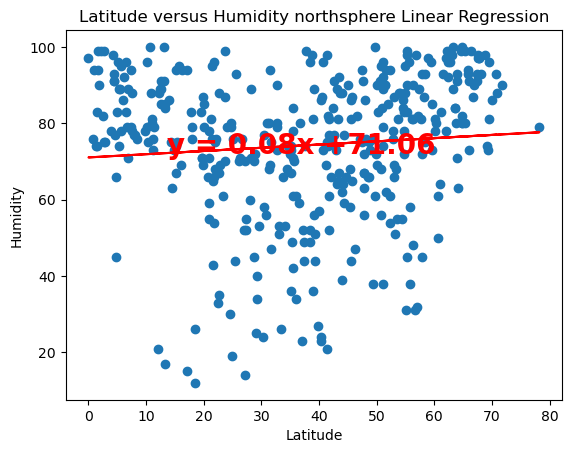

In [171]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", "northsphere")

City_ID
2      64.566162
8      65.792543
9      66.149727
10     65.361850
11     69.788022
         ...    
552    70.706743
554    70.734599
555    69.313529
560    67.949968
564    70.193400
Name: Lat, Length: 176, dtype: float64
y = 0.15x +72.57
The r-value is: 0.010256871245425453


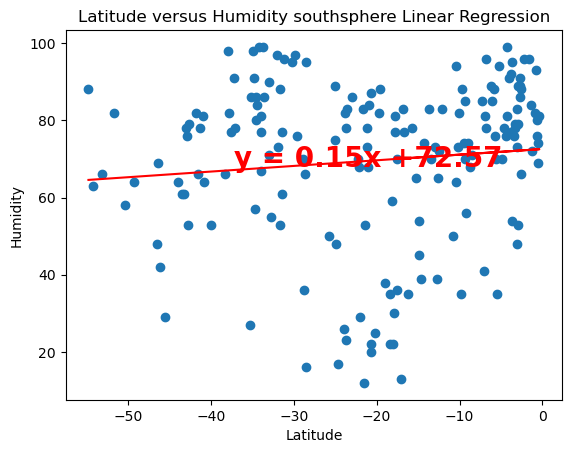

In [172]:
# Southern Hemisphere


linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity", "southsphere")

**Discussion about the linear relationship:**
In the southern hemisphere, the closer to the equator the higher the humidity for the randomly selected cities. The reverse holds in the Northern Hemisphere wehere the further away from the equaotr, the more humid the weather is. This is a bit of an anomaly as it is a well established fact that cities on our around the equator enjoy the highest humidity.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      63.234034
1      53.525011
3      61.659680
4      59.768382
5      57.826737
         ...    
558    57.438708
559    58.745265
561    55.409636
562    53.598213
563    51.973273
Name: Lat, Length: 389, dtype: float64
y = 0.2x +49.12
The r-value is: 0.01019670833270526


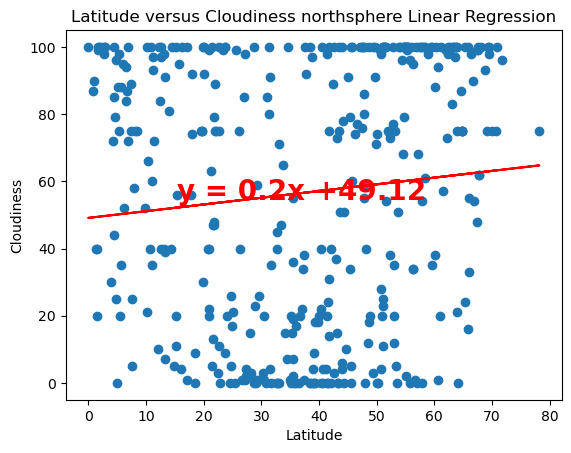

In [173]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "northsphere")

City_ID
2      46.802471
8      48.545809
9      49.053556
10     47.933565
11     54.225499
         ...    
552    55.531487
554    55.571085
555    53.550993
560    51.612651
564    54.801755
Name: Lat, Length: 176, dtype: float64
y = 0.21x +58.18
The r-value is: 0.006755612750885252


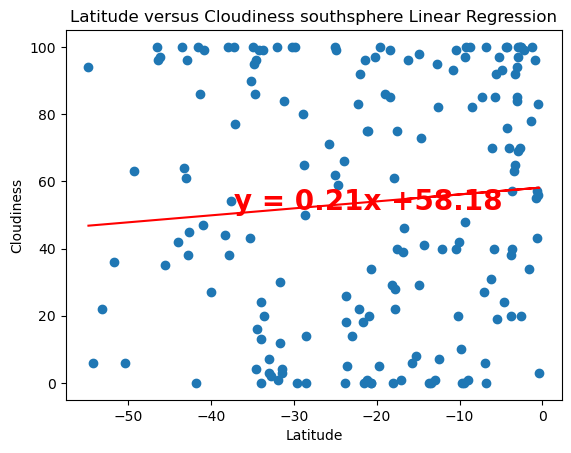

In [174]:
# Southern Hemisphere

linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness","southsphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a postive and strong correlation between cloudiness and latitdue. Cities in the extreme southern hemisphere are the least cloudy and that trend continues all the way to the topmost part of the Nothern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      3.568919
1      3.288896
3      3.523513
4      3.468965
5      3.412964
         ...   
558    3.401773
559    3.439456
561    3.343251
562    3.291007
563    3.244141
Name: Lat, Length: 389, dtype: float64
y = 0.01x +3.16
The r-value is: 0.0021524055021149664


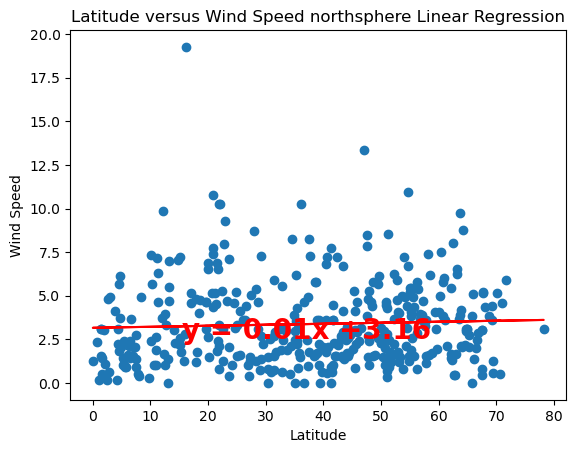

In [175]:
# Northern Hemisphere

linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "northsphere")

City_ID
2      4.535940
8      4.331674
9      4.272182
10     4.403410
11     3.666189
         ...   
552    3.513167
554    3.508528
555    3.745220
560    3.972334
564    3.598669
Name: Lat, Length: 176, dtype: float64
y = -0.02x +3.2
The r-value is: 0.018150486310727836


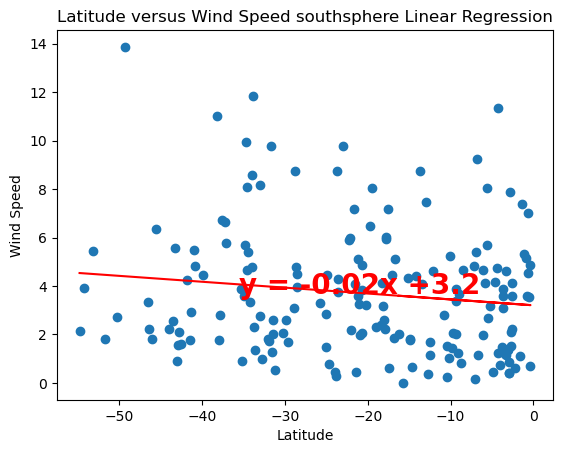

In [176]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "southsphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The windespeed has a fairly decent correlation to the latitude. The further away both northward and southwards from the equator, the higher the relative windspeed. There are fewer cities, the further north and south in the respective hemisphres.